# 2.Data Cleaning and description
***

<small> Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc <small>

For this Eda, the main question to answer is the following:

 **It is possible to predict the obessity number in US' counties with the 2019 sociograph census provided data?** 


In [55]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda

# DATASET
raw_total_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\Regularized-linear-regression\data\raw\raw_total_data.csv')
raw_total_data.info()

target = 'Obesity_number'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


The dataset has a total of 3140 rows and 108 columns. All the information about the dataset can be found in the following link:

https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/data_dict.csv


In [56]:
raw_total_data.head(2)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4


### 2.1. Drop irrelevant columns:

Since the amount of predictors in the dataset is high, first the columns will be dropped and then the general analysis will be carried on.

- **Population**: TOT_POP, 0-9, 10-19', 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80+
- **Population type**: White-alone pop, Black-alone pop, Native American/American Indian-alone pop, Asian-alone pop, Hawaiian/Pacific Islander-alone pop, Two or more races pop, Urban_rural_code
- **Population info**:, R_birth_2018, R_death_2018, POVALL_2018, MEDHHINC_2018, Employed_2018, Unemployed_2018
- **Population medical info**: Employed_2018, Unemployed_2018, Med_HH_Income_Percent_of_State_Total_2018, Active Physicians per 100000 Population 2018 (AAMC), Total Active Patient Care Physicians per 100000 Population 2018 (AAMC), Total Hospitals (2019), anycondition_number, Heart disease_number, COPD_number, diabetes_number, CKD_number

A total of 32 predictors were selected due to its presumed relationship with target.


In [57]:
selected_variables = [
'TOT_POP', '0-9', "19-Oct", '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
'White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop',
'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop', 'Urban_rural_code',
'R_birth_2018', 'R_death_2018', 'POVALL_2018', 'MEDHHINC_2018',
'Employed_2018', 'Unemployed_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 
'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 
'Total Hospitals (2019)', 'anycondition_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number',target
]

The mask will be applied to the dataset:

In [58]:
total_data = raw_total_data.copy()
total_data = total_data[selected_variables]
total_data

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Total Hospitals (2019),anycondition_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Obesity_number
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,...,119.0,217.1,196.7,1.148905,20181,3345,3644,5462,1326,15193
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,...,115.5,217.1,196.7,4.505074,68790,13414,14692,20520,5479,50761
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,...,68.9,217.1,196.7,0.514126,11325,2159,2373,3870,887,8013
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,...,92.3,217.1,196.7,0.462860,9190,1533,1789,2511,595,6894
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,...,101.1,217.1,196.7,1.195171,20584,4101,4661,6017,1507,15112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,6104,6326,5359,6577,5334,5261,4943,2198,949,...,117.8,207.9,199.6,2.160982,12796,1862,2098,2834,821,10672
3136,23081,2384,2185,2967,4093,3423,2928,2875,1569,657,...,159.2,207.9,199.6,1.158570,4576,981,928,1360,447,3655
3137,20299,3121,3205,2153,2702,2390,2434,2554,1233,507,...,101.8,207.9,199.6,1.018926,6101,1034,1163,1500,430,4944
3138,7885,858,1113,715,903,900,1085,1118,741,452,...,88.6,207.9,199.6,0.395794,2285,500,506,686,207,1730


### 2.2. Dataset general information

In [59]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 33 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   TOT_POP                                                                 3140 non-null   int64  
 1   0-9                                                                     3140 non-null   int64  
 2   19-Oct                                                                  3140 non-null   int64  
 3   20-29                                                                   3140 non-null   int64  
 4   30-39                                                                   3140 non-null   int64  
 5   40-49                                                                   3140 non-null   int64  
 6   50-59                                                                   3140 non

The dataset has no duplicates, no null values and all the columns are numerical.

### 2.3. Dataset measures

In [60]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_POP,3140.0,104189.412420,333583.395432,88.000000,10963.250000,25800.500000,67913.000000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05
80+,3140.0,4035.541720,12063.782251,0.000000,533.000000,1160.000000,2899.750000,3.562750e+05


There are many columns that has 0 value as minimun. Since this situation could be a possible outlier, it will be analyzed later on.

### 2.4. Data distribution:

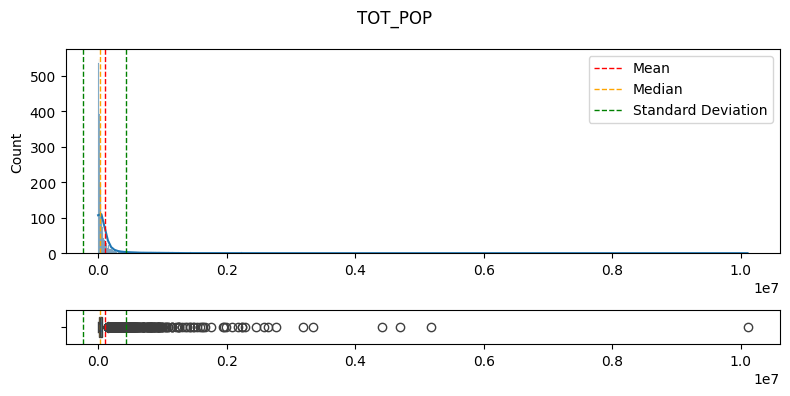

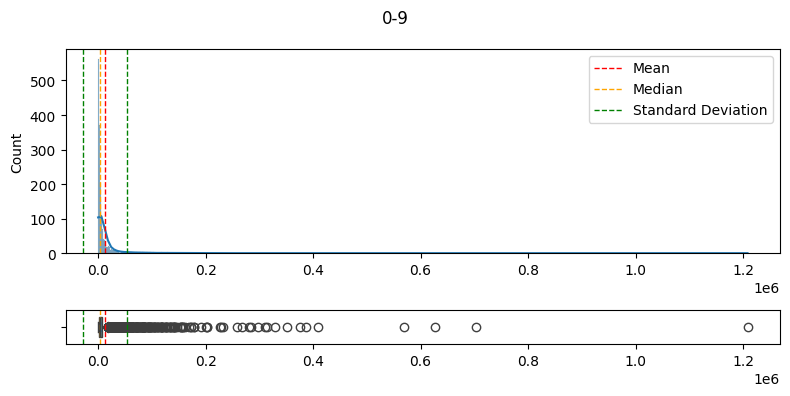

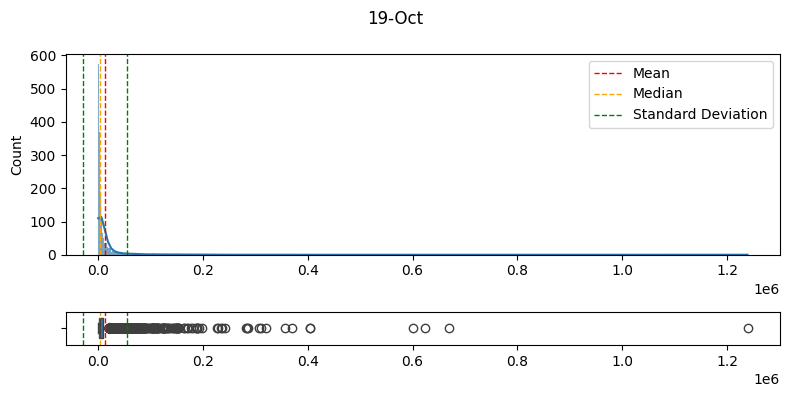

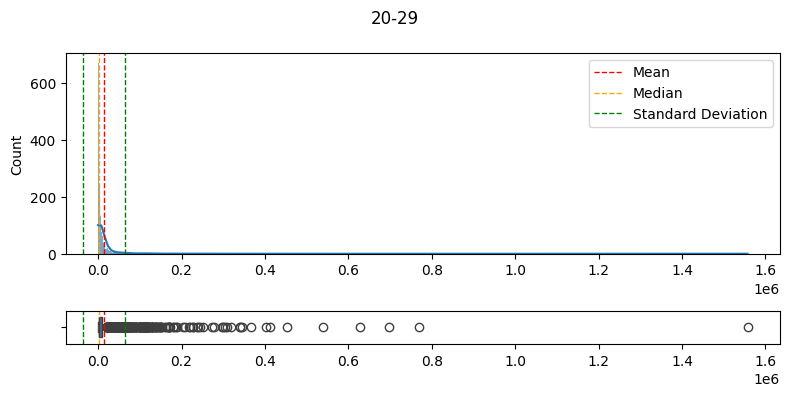

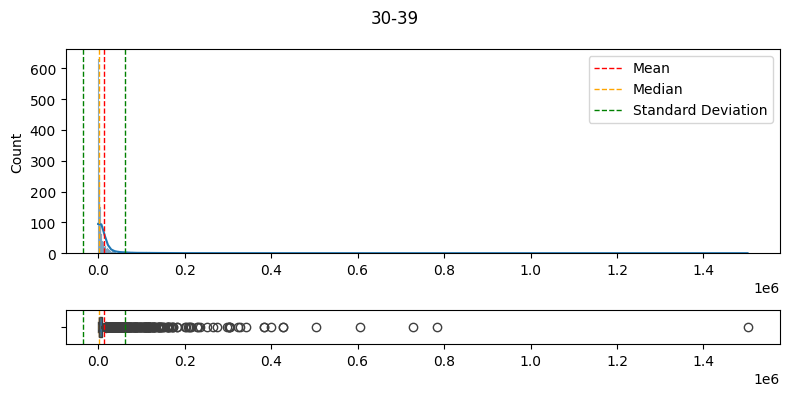

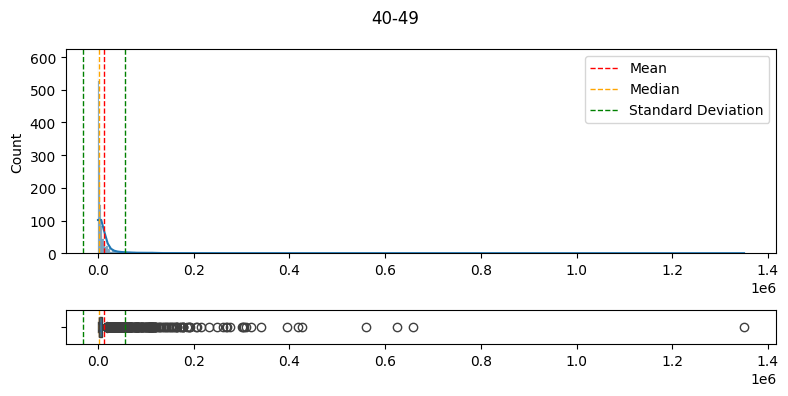

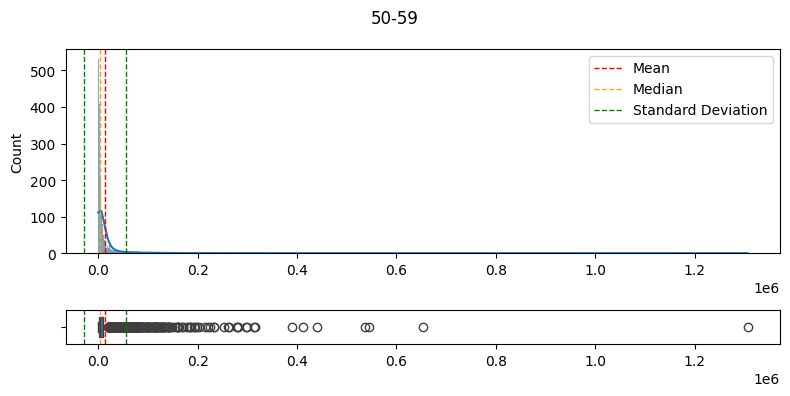

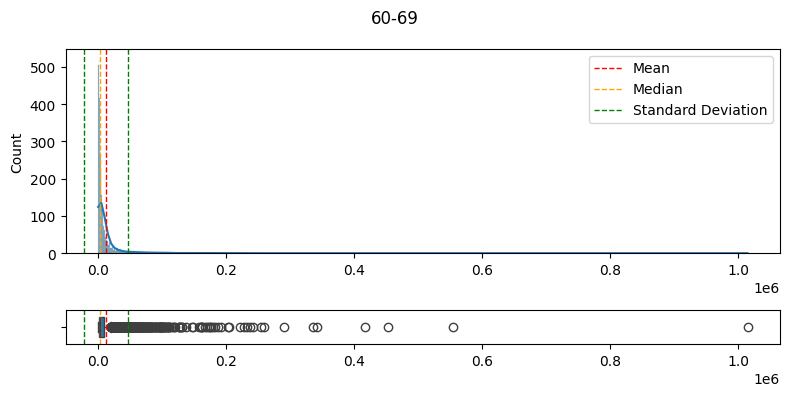

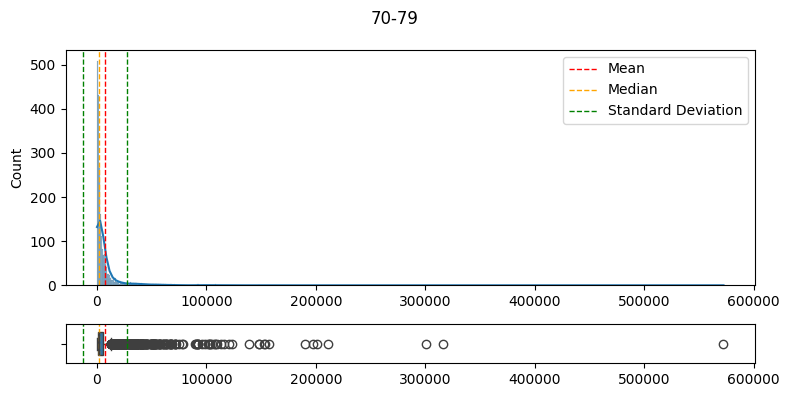

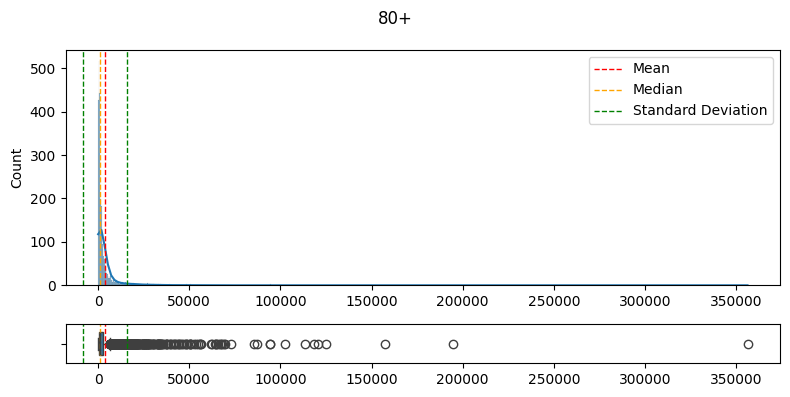

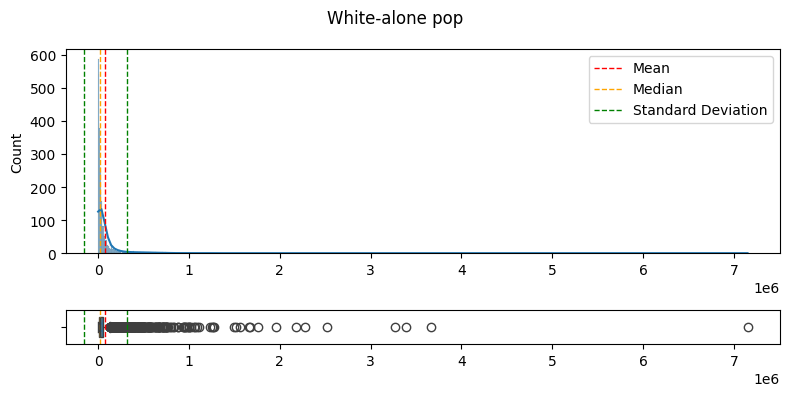

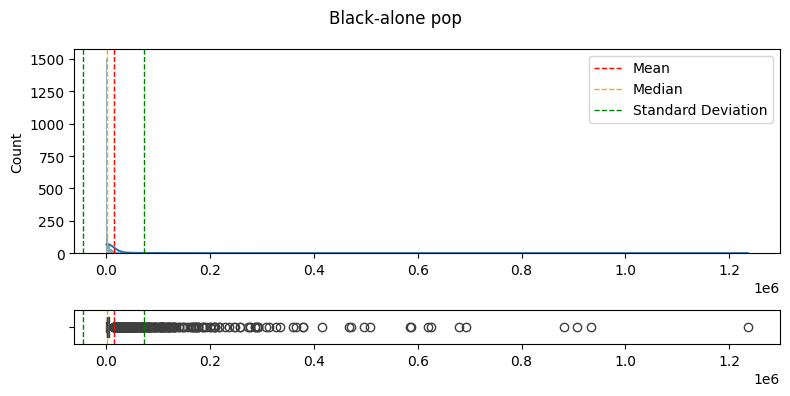

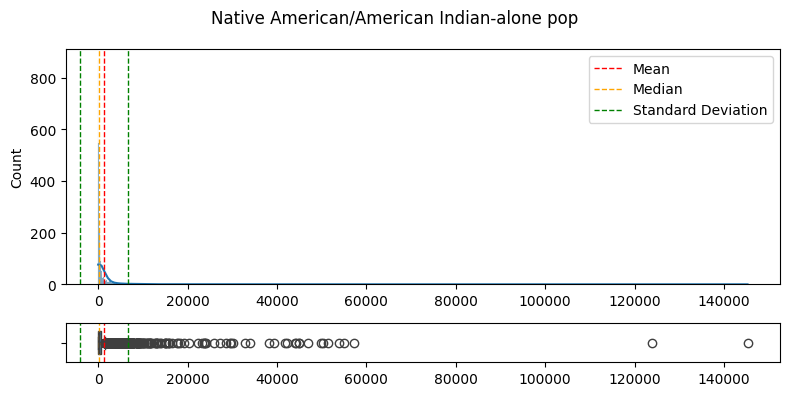

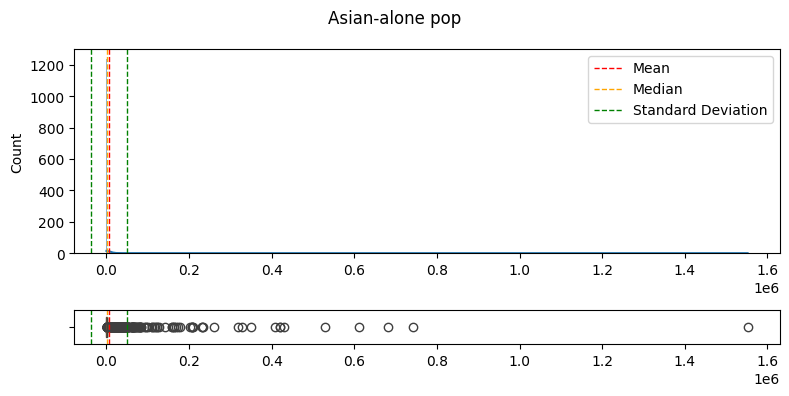

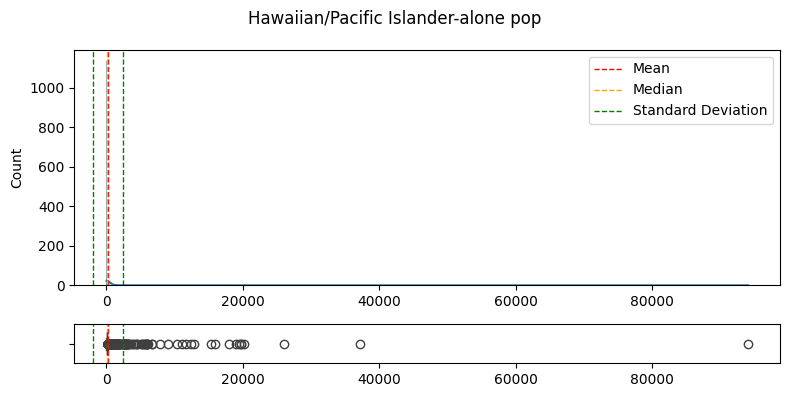

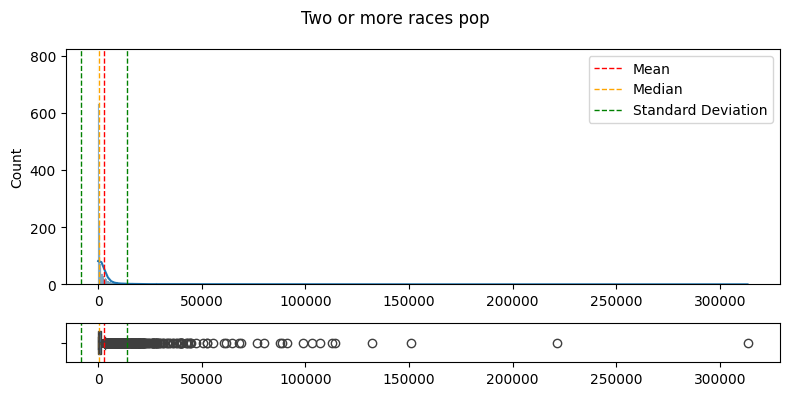

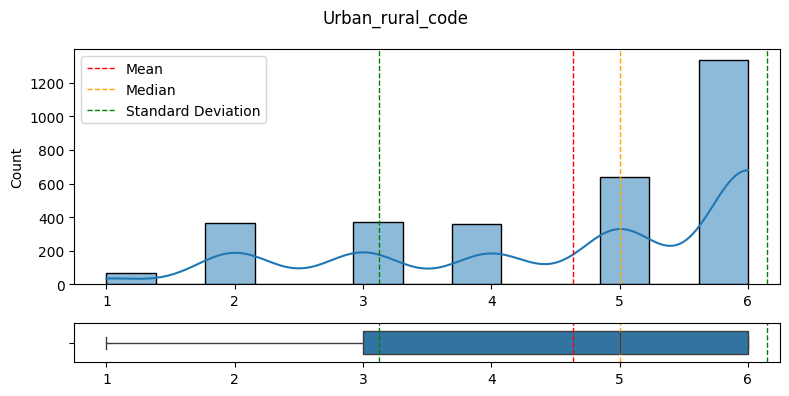

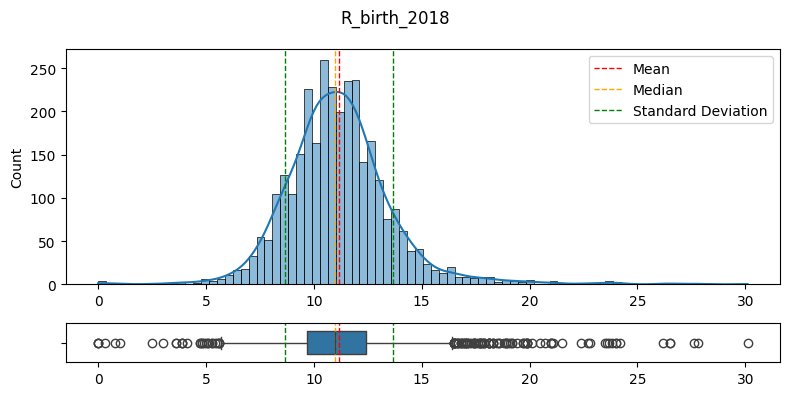

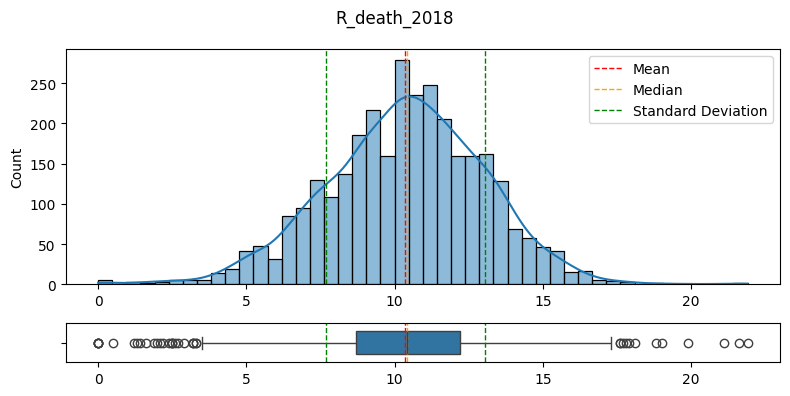

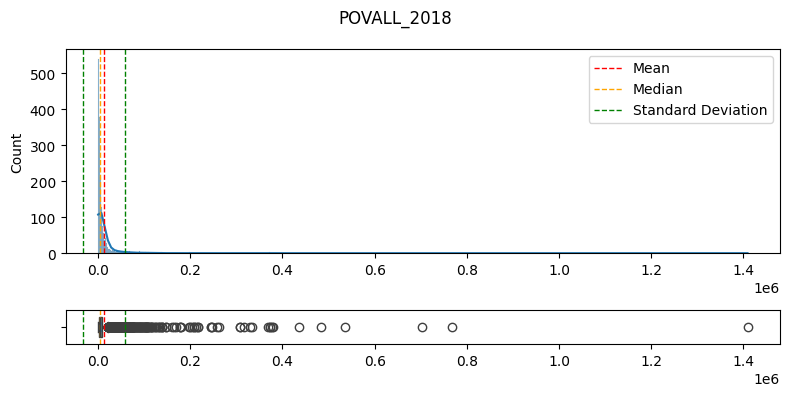

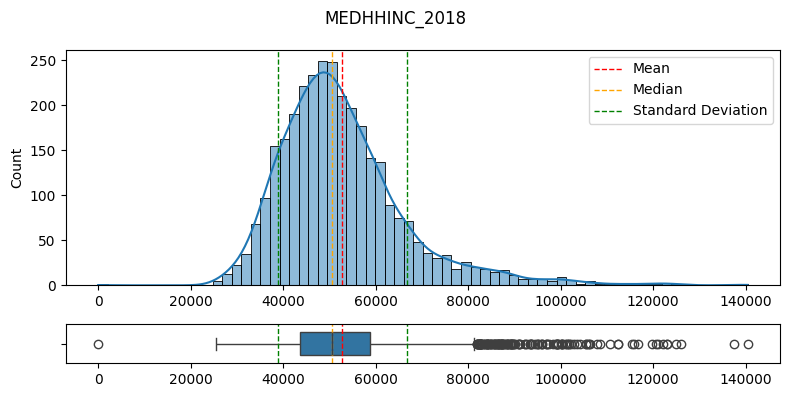

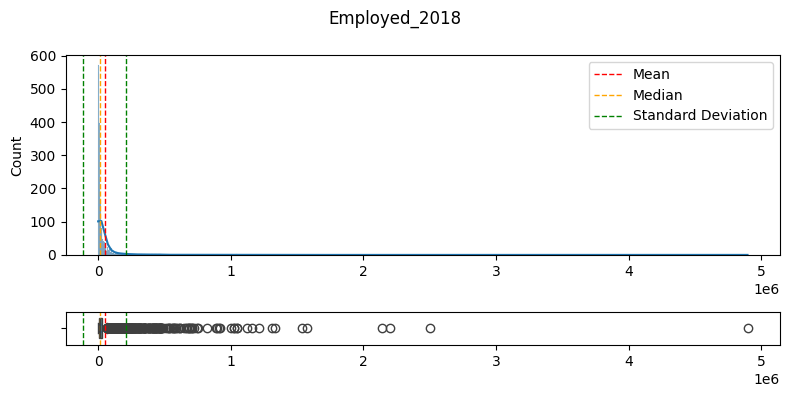

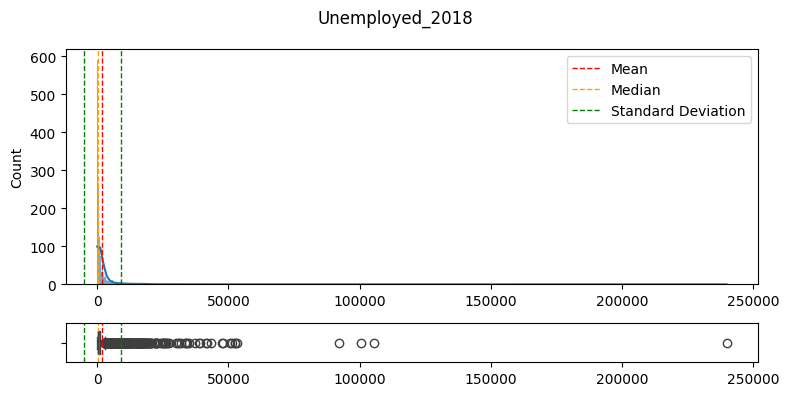

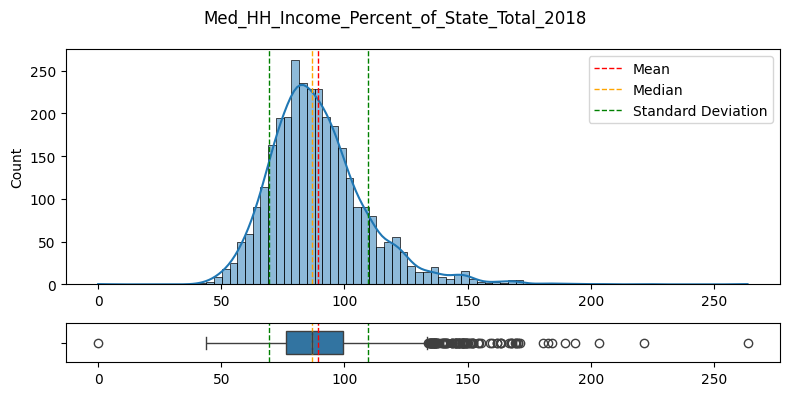

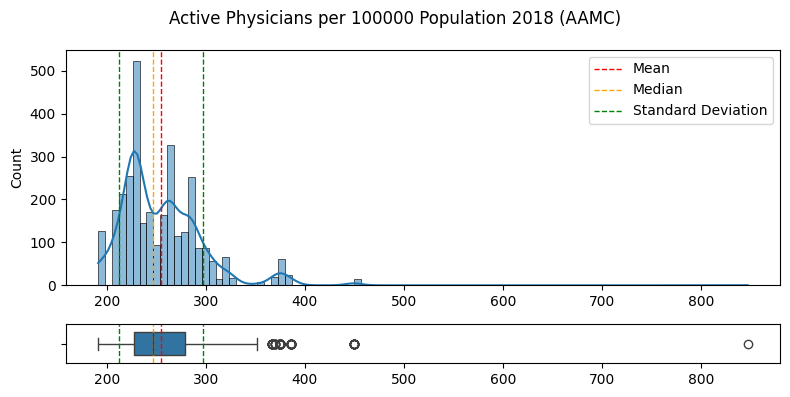

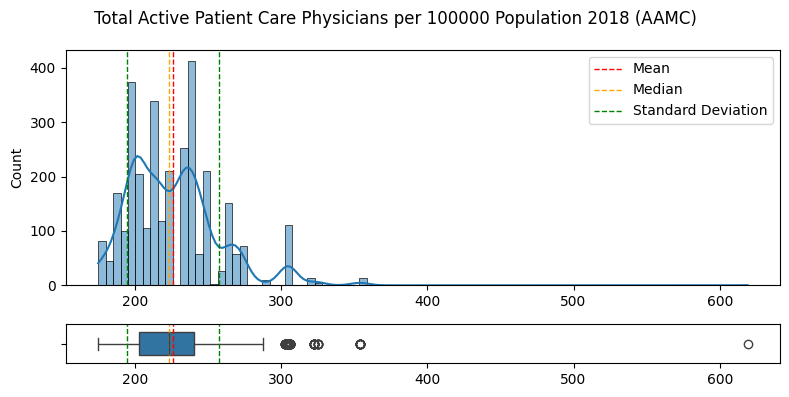

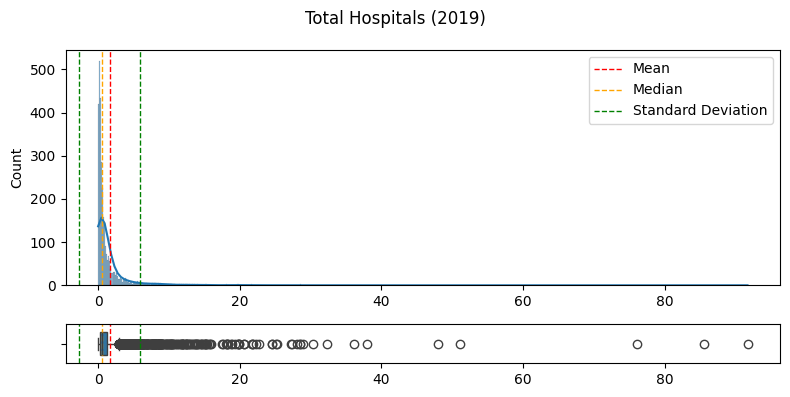

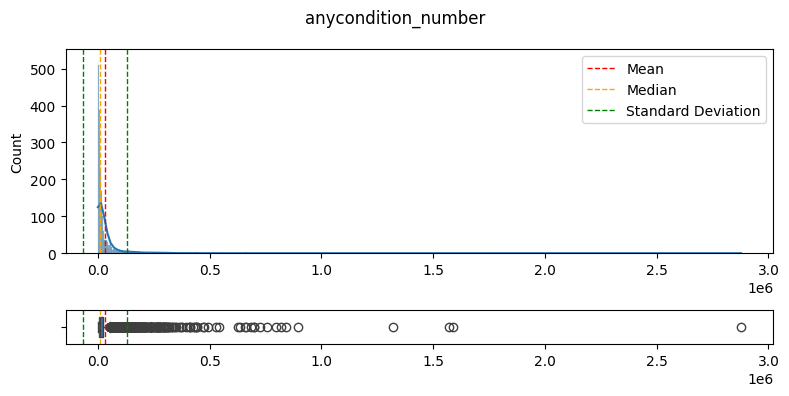

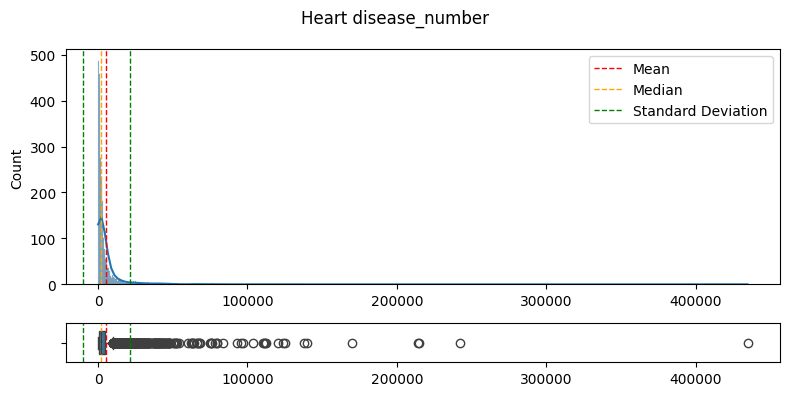

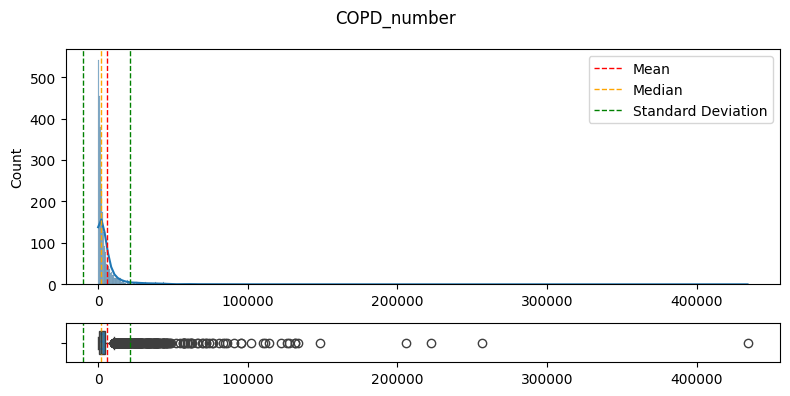

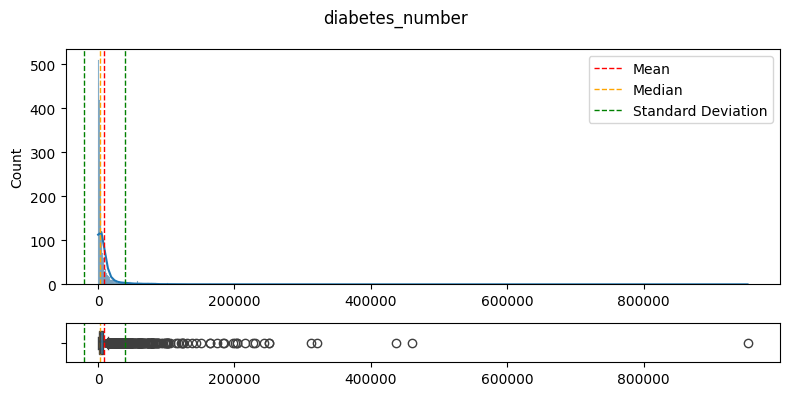

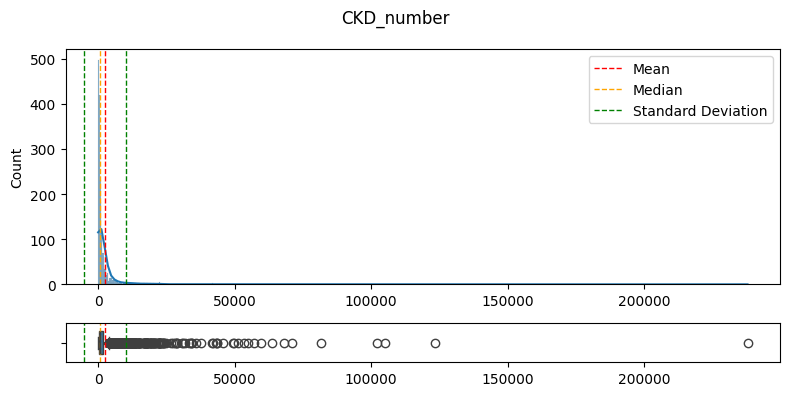

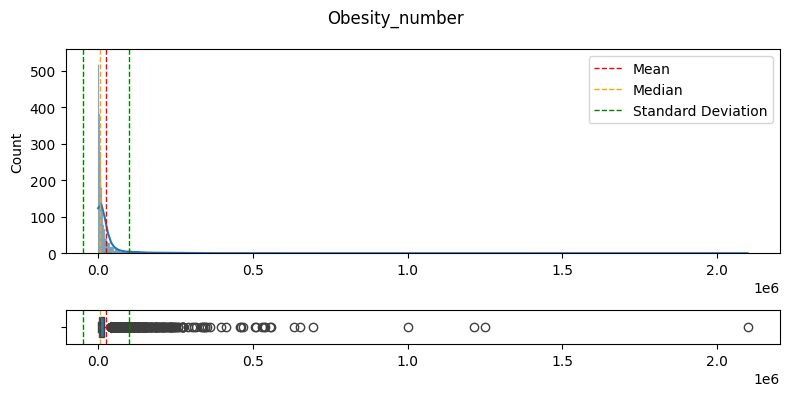

In [61]:
eda.plot_numerical_data(total_data)

Note: For 'Urban_rural_code', this will clarify the results: 
1. Counties in metro areas of 1 million population or more
2. Counties in metro areas of 250,000 to 1 million population
3. Counties in metro areas of fewer than 250,000 population
4. Urban population of 20,000 or more, adjacent to a metro area
5. Urban population of 20,000 or more, not adjacent to a metro area
6. Urban population of 2,500 to 19,999, adjacent to a metro area

The predictors analyzed have in average a normal distribution, leaning to the left in most of the cases .

### 2.5. Save the clean dataset

In [62]:
total_data.to_csv(r'C:\Users\Francesc\Documents\GitHub\Regularized-linear-regression\data\interim\eda_total_data.csv', index= False)

CONCLUSIONS

----

- The dataset contains 3140 rows and 108 columns. 

- The dataset has no duplicate rows, no null-values and all its collumns are numerical.

- Due to the amount of columns, a pre-selection of the predictors has been made manually.

- The result dataset contains 32 predictors and 1 target.

- The general analysis shows that several columns have 0 entries; this could be outliers and will be analyzed later on.
